In [1]:
from pandas import read_csv, DataFrame, Series
from pandas.plotting import scatter_matrix
from numpy import set_printoptions, argmax, isnan, nan, mean, random
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import tensorflow as tf
import numpy as np
import pandas as pd
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2.19.0
Num GPUs Available:  0


In [2]:
# Set random seeds for reproducibility
tf.keras.backend.clear_session()
random.seed(42)
tf.random.set_seed(42)

from perform_kickstarer_eda import X_train, X_test, y_train, y_test

# Define the model architecture
input_layer = tf.keras.layers.Input(shape=(X_train.shape[1],))
hidden = tf.keras.layers.Dense(32, activation="relu", kernel_initializer='he_normal')(input_layer)
# Change output layer to sigmoid for binary classification
output = tf.keras.layers.Dense(1, activation="sigmoid")(hidden)

model = tf.keras.models.Model(inputs=[input_layer], outputs=[output])
# Change to binary_crossentropy loss and classification metrics
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy", tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)
model.summary()

ks_data shape: (20632, 68)
Categorical columns: ['country', 'currency', 'deadline', 'state_changed_at', 'created_at', 'launched_at', 'category', 'deadline_weekday', 'state_changed_at_weekday', 'created_at_weekday', 'launched_at_weekday', 'launch_to_deadline', 'launch_to_state_change']
Converted boolean column: staff_pick
Dropped 'state_changed_at_weekday' column
Dropping original column: category
Encoded column: category → 25 features
Dropping original column: deadline_weekday
Encoded column: deadline_weekday → 7 features
Dropping original column: created_at_weekday
Encoded column: created_at_weekday → 7 features
Dropping original column: launched_at_weekday
Encoded column: launched_at_weekday → 7 features
Total categorical columns after encoding: 54


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,177 (8.50 KB)

 Trainable params: 2,177 (8.50 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Train the classifier
history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50


/opt/anaconda3/envs/tf/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 66))
  warnings.warn(msg)


487/516 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.8073 - auc: 0.8370 - loss: 0.4257 - precision: 0.7495 - recall: 0.4447  

/opt/anaconda3/envs/tf/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 66))
  warnings.warn(msg)


516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8109 - auc: 0.8430 - loss: 0.4189 - precision: 0.7550 - recall: 0.4579 - val_accuracy: 0.9144 - val_auc: 0.9692 - val_loss: 0.2139 - val_precision: 0.8602 - val_recall: 0.8497
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9176 - auc: 0.9725 - loss: 0.1999 - precision: 0.8636 - recall: 0.8508 - val_accuracy: 0.9169 - val_auc: 0.9725 - val_loss: 0.1960 - val_precision: 0.8608 - val_recall: 0.8587
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9219 - auc: 0.9750 - loss: 0.1860 - precision: 0.8691 - recall: 0.8608 - val_accuracy: 0.9200 - val_auc: 0.9736 - val_loss: 0.1911 - val_precision: 0.8640 - val_recall: 0.8668
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9234 - auc: 0.9760 - loss: 0.1812 - precision: 0.8704 - recall: 0.8653 - val_accuracy: 0.9212 - val_auc: 0.9741 - val_loss: 0.1886 - val_precision: 0.8652 - val_recall: 0.8701
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [4]:
# Hyperparameter tuning code for binary classifier
# configs = [
#     {"layers": [32], "activation": "relu"},
#     {"layers": [64], "activation": "relu"},
#     {"layers": [32], "activation": "tanh"},
#     {"layers": [64], "activation": "tanh"},
#     {"layers": [32], "activation": "selu"},
#     {"layers": [32], "activation": "sigmoid"},
# ]

# configs = [
#     {"layers": [16], "activation": "relu"},
#     {"layers": [32], "activation": "relu"},
#     {"layers": [64], "activation": "relu"},
#     {"layers": [128], "activation": "relu"},
#     {"layers": [256], "activation": "relu"},
#     {"layers": [32, 16], "activation": "relu"},
#     {"layers": [64, 32], "activation": "relu"},
#     {"layers": [128, 64], "activation": "relu"},
#     {"layers": [64, 32, 16], "activation": "relu"},
# ]

# Added tuning for optimizers and learning rates NOTE: Not sure if we should tune # of epochs as well (50,100,200)
configs = [
    {"layers": [16], "activation": "relu", "optimizer": "adam", "learning_rate": 0.001},
    {"layers": [16], "activation": "relu", "optimizer": "adam", "learning_rate": 0.01},
    {"layers": [32], "activation": "relu", "optimizer": "adam", "learning_rate": 0.001},
    {"layers": [32], "activation": "relu", "optimizer": "adam", "learning_rate": 0.01},
    {"layers": [64], "activation": "relu", "optimizer": "adam", "learning_rate": 0.001},
    {"layers": [64], "activation": "relu", "optimizer": "adam", "learning_rate": 0.01},
    {"layers": [128], "activation": "relu", "optimizer": "adam", "learning_rate": 0.001},
    {"layers": [128], "activation": "relu", "optimizer": "adam", "learning_rate": 0.01},
    {"layers": [256], "activation": "relu", "optimizer": "adam", "learning_rate": 0.001},
    {"layers": [256], "activation": "relu", "optimizer": "adam", "learning_rate": 0.01},
    {"layers": [32, 16], "activation": "relu", "optimizer": "adam", "learning_rate": 0.001},
    {"layers": [32, 16], "activation": "relu", "optimizer": "adam", "learning_rate": 0.01},
    {"layers": [64, 32], "activation": "relu", "optimizer": "adam", "learning_rate": 0.001},
    {"layers": [64, 32], "activation": "relu", "optimizer": "adam", "learning_rate": 0.01},
    {"layers": [128, 64], "activation": "relu", "optimizer": "adam", "learning_rate": 0.001},
    {"layers": [128, 64], "activation": "relu", "optimizer": "adam", "learning_rate": 0.01},
    {"layers": [64, 32, 16], "activation": "relu", "optimizer": "adam", "learning_rate": 0.001},
    {"layers": [64, 32, 16], "activation": "relu", "optimizer": "adam", "learning_rate": 0.01},

    {"layers": [16], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.001},
    {"layers": [16], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.01},
    {"layers": [32], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.001},
    {"layers": [32], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.01},
    {"layers": [64], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.001},
    {"layers": [64], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.01},
    {"layers": [128], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.001},
    {"layers": [128], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.01},
    {"layers": [256], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.001},
    {"layers": [256], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.01},
    {"layers": [32, 16], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.001},
    {"layers": [32, 16], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.01},
    {"layers": [64, 32], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.001},
    {"layers": [64, 32], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.01},
    {"layers": [128, 64], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.001},
    {"layers": [128, 64], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.01},
    {"layers": [64, 32, 16], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.001},
    {"layers": [64, 32, 16], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.01}
]

results = []
for config in configs:
    print(f"Trying config: {config}")
    tf.keras.backend.clear_session()

    if config["optimizer"] == "adam":
        optimizer = tf.keras.optimizers.Adam(config["learning_rate"])
    elif config["optimizer"] == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=config["learning_rate"])

    # Build model with current configuration
    input_layer = tf.keras.layers.Input(shape=(X_train.shape[1],))
    x = input_layer
    for units in config["layers"]:
        x = tf.keras.layers.Dense(units, activation=config["activation"])(x)

    # Binary classification output
    output = tf.keras.layers.Dense(1, activation="sigmoid")(x)

    model = tf.keras.models.Model(inputs=input_layer, outputs=output)
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy", tf.keras.metrics.AUC()]
    )
    model.summary()

    # Train model
    history = model.fit(
        X_train, y_train,
        epochs=50,
        validation_data=(X_test, y_test),
        verbose=0
    )

    # Get best results based on validation accuracy
    val_acc_hist = history.history["val_accuracy"]
    best_val_acc = np.max(val_acc_hist)
    best_epoch = np.argmax(val_acc_hist)

    best_loss = history.history["loss"][best_epoch]
    best_acc = history.history["accuracy"][best_epoch]
    best_val_loss = history.history["val_loss"][best_epoch]
    best_auc = history.history["auc"][best_epoch]
    best_val_auc = history.history["val_auc"][best_epoch]

    print(f"Best epoch: {best_epoch+1} | loss: {best_loss:.4f} - acc: {best_acc:.4f} - auc: {best_auc:.4f} - val_loss: {best_val_loss:.4f} - val_acc: {best_val_acc:.4f} - val_auc: {best_val_auc:.4f}")

    # Store results
    results.append({
        "config": config,
        "epoch": best_epoch+1,
        "loss": best_loss,
        "accuracy": best_acc,
        "auc": best_auc,
        "val_loss": best_val_loss,
        "val_accuracy": best_val_acc,
        "val_auc": best_val_auc,
        "history": history.history
    })

# Display results table
df_results = pd.DataFrame(results)
display(df_results)

Trying config: {'layers': [16], 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │         1,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,089 (4.25 KB)

 Trainable params: 1,089 (4.25 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 48 | loss: 0.1457 - acc: 0.9390 - auc: 0.9841 - val_loss: 0.1755 - val_acc: 0.9290 - val_auc: 0.9780
Trying config: {'layers': [16], 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.01}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │         1,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,089 (4.25 KB)

 Trainable params: 1,089 (4.25 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 26 | loss: 0.1446 - acc: 0.9403 - auc: 0.9842 - val_loss: 0.1823 - val_acc: 0.9290 - val_auc: 0.9757
Trying config: {'layers': [32], 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,177 (8.50 KB)

 Trainable params: 2,177 (8.50 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 29 | loss: 0.1366 - acc: 0.9436 - auc: 0.9861 - val_loss: 0.1698 - val_acc: 0.9358 - val_auc: 0.9786
Trying config: {'layers': [32], 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.01}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,177 (8.50 KB)

 Trainable params: 2,177 (8.50 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 7 | loss: 0.1625 - acc: 0.9321 - auc: 0.9803 - val_loss: 0.1864 - val_acc: 0.9241 - val_auc: 0.9757
Trying config: {'layers': [64], 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,353 (17.00 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 17 | loss: 0.1419 - acc: 0.9416 - auc: 0.9850 - val_loss: 0.1729 - val_acc: 0.9270 - val_auc: 0.9783
Trying config: {'layers': [64], 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.01}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,353 (17.00 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 13 | loss: 0.1382 - acc: 0.9429 - auc: 0.9855 - val_loss: 0.1894 - val_acc: 0.9266 - val_auc: 0.9750
Trying config: {'layers': [128], 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,705 (34.00 KB)

 Trainable params: 8,705 (34.00 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 14 | loss: 0.1336 - acc: 0.9459 - auc: 0.9867 - val_loss: 0.1798 - val_acc: 0.9280 - val_auc: 0.9766
Trying config: {'layers': [128], 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.01}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,705 (34.00 KB)

 Trainable params: 8,705 (34.00 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 3 | loss: 0.1785 - acc: 0.9246 - auc: 0.9759 - val_loss: 0.1859 - val_acc: 0.9237 - val_auc: 0.9738
Trying config: {'layers': [256], 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        17,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,409 (68.00 KB)

 Trainable params: 17,409 (68.00 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 10 | loss: 0.1372 - acc: 0.9443 - auc: 0.9860 - val_loss: 0.1798 - val_acc: 0.9278 - val_auc: 0.9770
Trying config: {'layers': [256], 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.01}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        17,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,409 (68.00 KB)

 Trainable params: 17,409 (68.00 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 2 | loss: 0.1904 - acc: 0.9196 - auc: 0.9727 - val_loss: 0.1927 - val_acc: 0.9220 - val_auc: 0.9727
Trying config: {'layers': [32, 16], 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 21 | loss: 0.1366 - acc: 0.9442 - auc: 0.9860 - val_loss: 0.1899 - val_acc: 0.9261 - val_auc: 0.9751
Trying config: {'layers': [32, 16], 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.01}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 19 | loss: 0.1424 - acc: 0.9418 - auc: 0.9846 - val_loss: 0.2017 - val_acc: 0.9268 - val_auc: 0.9733
Trying config: {'layers': [64, 32], 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,401 (25.00 KB)

 Trainable params: 6,401 (25.00 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 8 | loss: 0.1559 - acc: 0.9361 - auc: 0.9817 - val_loss: 0.1915 - val_acc: 0.9234 - val_auc: 0.9736
Trying config: {'layers': [64, 32], 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.01}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,401 (25.00 KB)

 Trainable params: 6,401 (25.00 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 12 | loss: 0.1428 - acc: 0.9393 - auc: 0.9845 - val_loss: 0.2173 - val_acc: 0.9270 - val_auc: 0.9709
Trying config: {'layers': [128, 64], 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 8 | loss: 0.1359 - acc: 0.9435 - auc: 0.9858 - val_loss: 0.1991 - val_acc: 0.9198 - val_auc: 0.9739
Trying config: {'layers': [128, 64], 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.01}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 5 | loss: 0.1676 - acc: 0.9304 - auc: 0.9789 - val_loss: 0.2095 - val_acc: 0.9232 - val_auc: 0.9701
Trying config: {'layers': [64, 32, 16], 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,913 (27.00 KB)

 Trainable params: 6,913 (27.00 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 11 | loss: 0.1359 - acc: 0.9445 - auc: 0.9862 - val_loss: 0.1972 - val_acc: 0.9200 - val_auc: 0.9749
Trying config: {'layers': [64, 32, 16], 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.01}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,913 (27.00 KB)

 Trainable params: 6,913 (27.00 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 13 | loss: 0.1410 - acc: 0.9402 - auc: 0.9850 - val_loss: 0.2076 - val_acc: 0.9275 - val_auc: 0.9727
Trying config: {'layers': [16], 'activation': 'relu', 'optimizer': 'sgd', 'learning_rate': 0.001}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │         1,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,089 (4.25 KB)

 Trainable params: 1,089 (4.25 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 49 | loss: 0.1993 - acc: 0.9187 - auc: 0.9713 - val_loss: 0.2016 - val_acc: 0.9195 - val_auc: 0.9707
Trying config: {'layers': [16], 'activation': 'relu', 'optimizer': 'sgd', 'learning_rate': 0.01}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │         1,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,089 (4.25 KB)

 Trainable params: 1,089 (4.25 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 47 | loss: 0.1729 - acc: 0.9282 - auc: 0.9779 - val_loss: 0.1809 - val_acc: 0.9237 - val_auc: 0.9757
Trying config: {'layers': [32], 'activation': 'relu', 'optimizer': 'sgd', 'learning_rate': 0.001}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,177 (8.50 KB)

 Trainable params: 2,177 (8.50 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 50 | loss: 0.1986 - acc: 0.9201 - auc: 0.9715 - val_loss: 0.2029 - val_acc: 0.9169 - val_auc: 0.9706
Trying config: {'layers': [32], 'activation': 'relu', 'optimizer': 'sgd', 'learning_rate': 0.01}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,177 (8.50 KB)

 Trainable params: 2,177 (8.50 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 47 | loss: 0.1699 - acc: 0.9290 - auc: 0.9784 - val_loss: 0.1794 - val_acc: 0.9239 - val_auc: 0.9767
Trying config: {'layers': [64], 'activation': 'relu', 'optimizer': 'sgd', 'learning_rate': 0.001}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,353 (17.00 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 50 | loss: 0.1983 - acc: 0.9188 - auc: 0.9718 - val_loss: 0.2037 - val_acc: 0.9157 - val_auc: 0.9704
Trying config: {'layers': [64], 'activation': 'relu', 'optimizer': 'sgd', 'learning_rate': 0.01}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,353 (17.00 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 16 | loss: 0.1829 - acc: 0.9245 - auc: 0.9755 - val_loss: 0.1870 - val_acc: 0.9217 - val_auc: 0.9747
Trying config: {'layers': [128], 'activation': 'relu', 'optimizer': 'sgd', 'learning_rate': 0.001}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,705 (34.00 KB)

 Trainable params: 8,705 (34.00 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 40 | loss: 0.2021 - acc: 0.9190 - auc: 0.9710 - val_loss: 0.2058 - val_acc: 0.9178 - val_auc: 0.9702
Trying config: {'layers': [128], 'activation': 'relu', 'optimizer': 'sgd', 'learning_rate': 0.01}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,705 (34.00 KB)

 Trainable params: 8,705 (34.00 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 50 | loss: 0.1677 - acc: 0.9306 - auc: 0.9791 - val_loss: 0.1777 - val_acc: 0.9244 - val_auc: 0.9767
Trying config: {'layers': [256], 'activation': 'relu', 'optimizer': 'sgd', 'learning_rate': 0.001}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        17,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,409 (68.00 KB)

 Trainable params: 17,409 (68.00 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 48 | loss: 0.1983 - acc: 0.9205 - auc: 0.9720 - val_loss: 0.2021 - val_acc: 0.9183 - val_auc: 0.9711
Trying config: {'layers': [256], 'activation': 'relu', 'optimizer': 'sgd', 'learning_rate': 0.01}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        17,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,409 (68.00 KB)

 Trainable params: 17,409 (68.00 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 48 | loss: 0.1671 - acc: 0.9315 - auc: 0.9793 - val_loss: 0.1763 - val_acc: 0.9256 - val_auc: 0.9770
Trying config: {'layers': [32, 16], 'activation': 'relu', 'optimizer': 'sgd', 'learning_rate': 0.001}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 50 | loss: 0.1918 - acc: 0.9219 - auc: 0.9729 - val_loss: 0.1960 - val_acc: 0.9186 - val_auc: 0.9719
Trying config: {'layers': [32, 16], 'activation': 'relu', 'optimizer': 'sgd', 'learning_rate': 0.01}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 45 | loss: 0.1698 - acc: 0.9295 - auc: 0.9786 - val_loss: 0.1787 - val_acc: 0.9258 - val_auc: 0.9763
Trying config: {'layers': [64, 32], 'activation': 'relu', 'optimizer': 'sgd', 'learning_rate': 0.001}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,401 (25.00 KB)

 Trainable params: 6,401 (25.00 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 50 | loss: 0.1889 - acc: 0.9243 - auc: 0.9740 - val_loss: 0.1934 - val_acc: 0.9205 - val_auc: 0.9729
Trying config: {'layers': [64, 32], 'activation': 'relu', 'optimizer': 'sgd', 'learning_rate': 0.01}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,401 (25.00 KB)

 Trainable params: 6,401 (25.00 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 50 | loss: 0.1676 - acc: 0.9309 - auc: 0.9789 - val_loss: 0.1765 - val_acc: 0.9261 - val_auc: 0.9770
Trying config: {'layers': [128, 64], 'activation': 'relu', 'optimizer': 'sgd', 'learning_rate': 0.001}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 41 | loss: 0.1905 - acc: 0.9227 - auc: 0.9736 - val_loss: 0.1938 - val_acc: 0.9210 - val_auc: 0.9728
Trying config: {'layers': [128, 64], 'activation': 'relu', 'optimizer': 'sgd', 'learning_rate': 0.01}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 44 | loss: 0.1650 - acc: 0.9318 - auc: 0.9798 - val_loss: 0.1778 - val_acc: 0.9263 - val_auc: 0.9768
Trying config: {'layers': [64, 32, 16], 'activation': 'relu', 'optimizer': 'sgd', 'learning_rate': 0.001}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,913 (27.00 KB)

 Trainable params: 6,913 (27.00 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 49 | loss: 0.1819 - acc: 0.9259 - auc: 0.9753 - val_loss: 0.1916 - val_acc: 0.9227 - val_auc: 0.9728
Trying config: {'layers': [64, 32, 16], 'activation': 'relu', 'optimizer': 'sgd', 'learning_rate': 0.01}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,913 (27.00 KB)

 Trainable params: 6,913 (27.00 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 26 | loss: 0.1735 - acc: 0.9281 - auc: 0.9773 - val_loss: 0.1828 - val_acc: 0.9268 - val_auc: 0.9751


,config,epoch,loss,accuracy,auc,val_loss,val_accuracy,val_auc,history
0,"{'layers': [16], 'activation': 'relu', 'optimi...",48,0.145703,0.938973,0.984088,0.175476,0.928987,0.977989,"{'accuracy': [0.8291012644767761, 0.9138839840..."
1,"{'layers': [16], 'activation': 'relu', 'optimi...",26,0.144606,0.940307,0.984190,0.182258,0.928987,0.975658,"{'accuracy': [0.9055814743041992, 0.9213380813..."
2,"{'layers': [32], 'activation': 'relu', 'optimi...",29,0.136632,0.943579,0.986101,0.169837,0.935773,0.978587,"{'accuracy': [0.8794618248939514, 0.9200048446..."
3,"{'layers': [32], 'activation': 'relu', 'optimi...",7,0.162516,0.932125,0.980286,0.186433,0.924140,0.975744,"{'accuracy': [0.9038240313529968, 0.9213986992..."
4,"{'layers': [64], 'activation': 'relu', 'optimi...",17,0.141885,0.941579,0.985026,0.172933,0.927048,0.978265,"{'accuracy': [0.8819465637207031, 0.9212775230..."
5,"{'layers': [64], 'activation': 'relu', 'optimi...",13,0.138187,0.942852,0.985531,0.189438,0.926563,0.974996,"{'accuracy': [0.9075813293457031, 0.9207926988..."
6,"{'layers': [128], 'activation': 'relu', 'optim...",14,0.133628,0.945882,0.986685,0.179798,0.928017,0.976630,"{'accuracy': [0.8807345032691956, 0.9217623472..."
7,"{'layers': [128], 'activation': 'relu', 'optim...",3,0.178487,0.924550,0.975948,0.185900,0.923655,0.973831,"{'accuracy': [0.9073995351791382, 0.9198836684..."
8,"{'layers': [256], 'activation': 'relu', 'optim...",10,0.137175,0.944306,0.985970,0.179788,0.927775,0.977044,"{'accuracy': [0.9006726741790771, 0.9236409664..."
9,"{'layers': [256], 'activation': 'relu', 'optim...",2,0.190442,0.919641,0.972728,0.192678,0.921958,0.972683,"{'accuracy': [0.9069147109985352, 0.9196412563..."


In [5]:
# Select the best model configuration based on validation accuracy
best_idx = df_results["val_accuracy"].idxmax()
best_config = df_results.loc[best_idx, "config"]
print(f"Best configuration: {best_config}")

# Build final model with best configuration
tf.keras.backend.clear_session()
input_layer = tf.keras.layers.Input(shape=(X_train.shape[1],))
x = input_layer
for units in best_config["layers"]:
    x = tf.keras.layers.Dense(units, activation=best_config["activation"])(x)
output = tf.keras.layers.Dense(1, activation="sigmoid")(x)

final_model = tf.keras.models.Model(inputs=input_layer, outputs=output)
final_model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy", tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Train the final model
final_history = final_model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    verbose=1
)

Best configuration: {'layers': [32], 'activation': 'relu', 'optimizer': 'adam', 'learning_rate': 0.001}
Epoch 1/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7497 - auc: 0.7922 - loss: 0.4712 - precision: 0.6238 - recall: 0.4282 - val_accuracy: 0.9123 - val_auc: 0.9675 - val_loss: 0.2193 - val_precision: 0.8622 - val_recall: 0.8382
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9181 - auc: 0.9716 - loss: 0.2028 - precision: 0.8626 - recall: 0.8542 - val_accuracy: 0.9178 - val_auc: 0.9718 - val_loss: 0.1978 - val_precision: 0.8672 - val_recall: 0.8538
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step - accuracy: 0.9225 - auc: 0.9748 - loss: 0.1865 - precision: 0.8670 - recall: 0.8663 - val_accuracy: 0.9205 - val_auc: 0.9733 - val_loss: 0.1916 - val_precision: 0.8678 - val_recall: 0.8636
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.9241 - auc: 0.9759 - loss: 0.1811 - precision: 0.8685 - recall: 0.8705 - val_accuracy: 0.9227 - val_

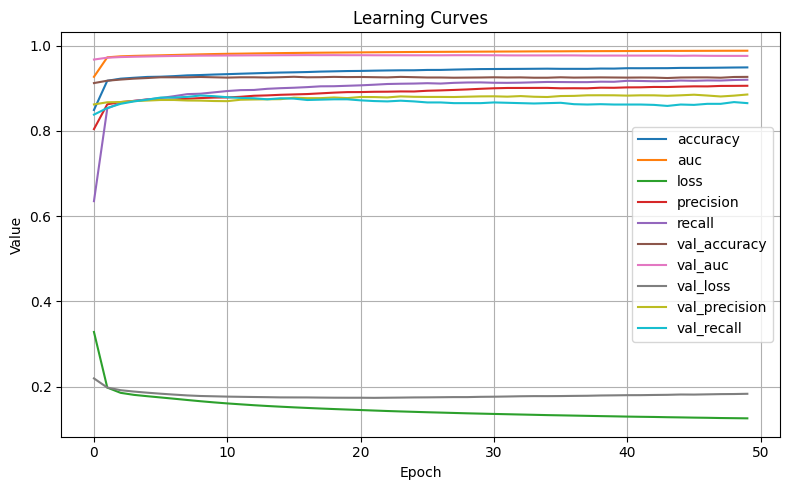

In [6]:
# Plot learning curves for final model
DataFrame(final_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title("Learning Curves")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.9284 - auc: 0.9771 - loss: 0.1778 - precision: 0.8866 - recall: 0.8675
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step
Test Accuracy: 0.9268
Test AUC: 0.9761
Test Precision: 0.8855
Test Recall: 0.8652

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2902
           1       0.89      0.87      0.88      1224

    accuracy                           0.93      4126
   macro avg       0.91      0.91      0.91      4126
weighted avg       0.93      0.93      0.93      4126


Confusion Matrix:
[[2765  137]
 [ 165 1059]]


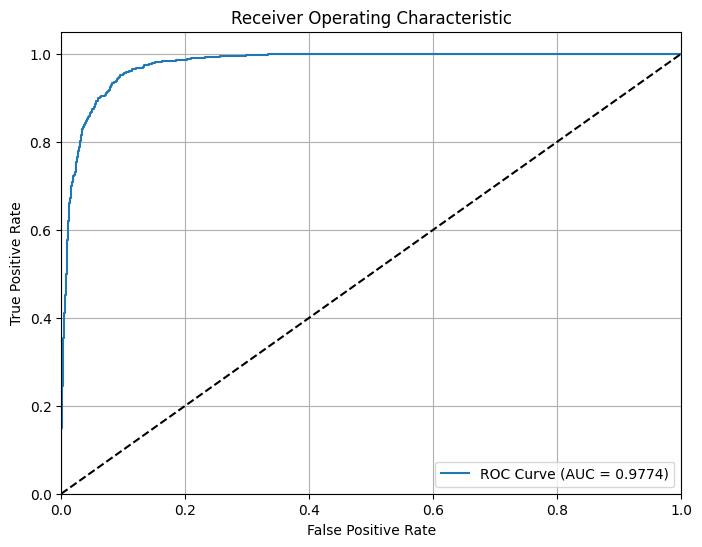

In [7]:
# Evaluate the final model
test_loss, test_acc, test_auc, test_precision, test_recall = final_model.evaluate(X_test, y_test)

# Get predictions
y_pred_prob = final_model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Print metrics
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test AUC: {test_auc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()